#### Merge Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#File path
excel_file_path = 'Excel_files/Task_Data_Scientist_Dataset.xlsx'

# Make excel sheets into dataframes
df_sheet2 = pd.read_excel(excel_file_path, sheet_name='Soc_Dem')
df_sheet3 = pd.read_excel(excel_file_path, sheet_name='Products_ActBalance')
df_sheet4 = pd.read_excel(excel_file_path, sheet_name='Inflow_Outflow')
df_sheet5 = pd.read_excel(excel_file_path, sheet_name='Sales_Revenues')

# Merging the Dataframes based on the column 'Client'
df = pd.merge(df_sheet2, df_sheet3, on='Client', how='outer')
df = pd.merge(df, df_sheet4, on='Client', how='outer')

# Distinguish the full merged dataset and the individual ones accounting for 60%
df_merge = pd.merge(df, df_sheet5, on='Client', how='outer')

display(df_merge.shape)
display(df_merge.head())

(1615, 36)

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,909,M,21,27,1,NaN,NaN,1.0,NaN,1.0,...,7.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1217,M,38,165,1,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,850,F,49,44,1,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.0
3,1473,M,54,34,1,1.0,NaN,NaN,1.0,1.0,...,38.0,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.0
4,1038,M,29,106,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


#### Exploratory Data Analysis

In [31]:
duplicate_rows = df_merge.duplicated().sum()

print('Total number of duplicate rows:',duplicate_rows)

Total number of duplicate rows: 0


In [13]:
# Create dummy variables for Sex
sex_mapping = {'M': 1, 'F': 0}
df_merge['Sex'] = df_merge['Sex'].replace(sex_mapping)

In [14]:
# Replace missing values with 0
df_merge = df_merge.replace(np.nan,0)

##### Client Age

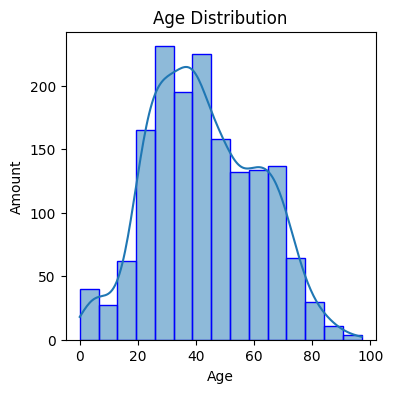

In [37]:
# Review the age distribution

plt.figure(figsize=(4, 4))

sns.histplot(df_merge['Age'], bins=15, edgecolor="b", kde=True)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Amount')

plt.show()


There seem to be ages that are quite young. Here, I will verify whether there are 
clients that are younger than 10 years old (min age account opening in Belgium). 
Moreover, I will verify whether there are irregularities of 'Tenure' being larger than the actual age of a client.

In [17]:
# Verify the rows where Age is less than 10 years old

age_threshold = df['Age'] < 10
print("Underage clients:", age_threshold.sum())

Underage clients: 51


In [16]:
# Verify when Tenure in years is larger than Age

anomaly_tenure = df['Tenure']/12 > df['Age']

print("Number of anomalies:", anomaly_tenure.sum())

Number of anomalies: 47


##### Sales Revenue

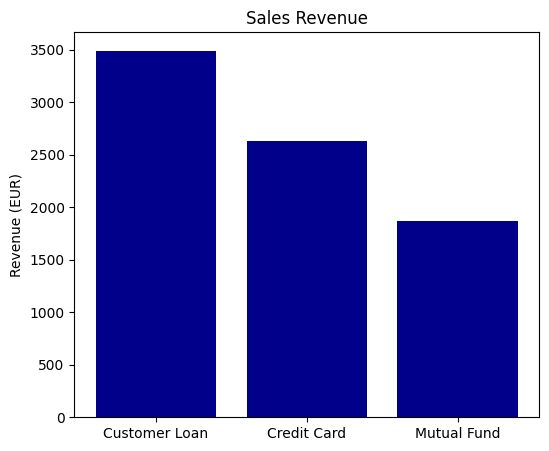

In [54]:
plt.figure(figsize=(6,5))

columns = np.arange(3)
revenue = [df_merge['Revenue_CL'].sum(), df_merge['Revenue_CC'].sum(), df_merge['Revenue_MF'].sum()]

plt.bar(columns, revenue, align='center', color="darkblue")
plt.xticks(columns, ['Customer Loan','Credit Card','Mutual Fund'])
plt.ylabel('Revenue (EUR)')
plt.title('Sales Revenue')
plt.show()

### Training Set

In [7]:
# 60% conveying training set, hence excluding df_merge
df_train = pd.merge(df, df_sheet5, on='Client', how='inner')

display(df_train.shape)
display(df_train.head())

(969, 36)

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1217,M,38,165,1,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0,0,0,0.000000,0.000000,0.000000
1,850,F,49,44,1,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,1.0,0,1,0,0.000000,0.893929,0.000000
2,1473,M,54,34,1,1.0,NaN,NaN,1.0,1.0,...,38.0,1.0,26.0,11.0,1,0,0,4.929643,0.000000,0.000000
3,1038,M,29,106,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0.000000,0.000000,0.000000
4,225,M,14,187,1,NaN,NaN,1.0,NaN,NaN,...,5.0,0.0,4.0,1.0,0,0,1,0.000000,0.000000,8.130714


In [8]:
# Create full training set for consumer loan

consumer_loan = ['Sale_MF','Sale_CC','Revenue_MF','Revenue_CC','Count_CL','ActBal_CL']
df_train_cl = df_train.drop(consumer_loan,axis=1)

# Create full training set for credit card
credit_card = ['Sale_MF','Sale_CL','Revenue_MF','Revenue_CL','Count_CC','ActBal_CC']
df_train_cc  = df_train.drop(credit_card,axis=1)

# Create full training set for mutual fund
mutual_fund = ['Sale_CC','Sale_CL','Revenue_CC','Revenue_CL','Count_MF','ActBal_MF']
df_train_mf = df_train.drop(mutual_fund,axis=1)

In [9]:
print(df_train_cl.shape)

print(df_train_cc.shape)

print(df_train_mf.shape)

(969, 30)
(969, 30)
(969, 30)


### Types

In [11]:
df_train_cl[df_train_cl.columns[:18]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Client               969 non-null    int64  
 1   Sex                  967 non-null    object 
 2   Age                  969 non-null    int64  
 3   Tenure               969 non-null    int64  
 4   Count_CA             969 non-null    int64  
 5   Count_SA             265 non-null    float64
 6   Count_MF             184 non-null    float64
 7   Count_OVD            251 non-null    float64
 8   Count_CC             110 non-null    float64
 9   ActBal_CA            969 non-null    float64
 10  ActBal_SA            265 non-null    float64
 11  ActBal_MF            184 non-null    float64
 12  ActBal_OVD           251 non-null    float64
 13  ActBal_CC            110 non-null    float64
 14  VolumeCred           951 non-null    float64
 15  VolumeCred_CA        951 non-null    flo

In [12]:
df_train_cl[df_train_cl.columns[18:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   VolumeDeb                     951 non-null    float64
 1   VolumeDeb_CA                  951 non-null    float64
 2   VolumeDebCash_Card            951 non-null    float64
 3   VolumeDebCashless_Card        951 non-null    float64
 4   VolumeDeb_PaymentOrder        951 non-null    float64
 5   TransactionsDeb               951 non-null    float64
 6   TransactionsDeb_CA            951 non-null    float64
 7   TransactionsDebCash_Card      951 non-null    float64
 8   TransactionsDebCashless_Card  951 non-null    float64
 9   TransactionsDeb_PaymentOrder  951 non-null    float64
 10  Sale_CL                       969 non-null    int64  
 11  Revenue_CL                    969 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 91.0 KB


### Dummy Variable

In [14]:
# Numerical features
numerical_features = df_train_cl.select_dtypes(include=['number']).columns.tolist()

# Categorical features
categorical_features = df_train_cl.select_dtypes(include=['object']).columns.tolist()


print("Numerical Features:\n",numerical_features)
print("Categorical Features:\n",categorical_features)

Numerical Features:
 ['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder', 'Sale_CL', 'Revenue_CL']
Categorical Features:
 []


In [15]:
# Create dummy variables for Sex
sex_mapping = {'M': 1, 'F': 0}
df_train_cl['Sex'] = df_train_cl['Sex'].replace(sex_mapping)

In [16]:
df_train_cl.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,ActBal_CA,...,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_CL,Revenue_CL
0,909,1.0,21,27,1,NaN,NaN,1.0,NaN,4.710714,...,178.571429,0.0000,166.571429,8.0,7.0,1.0,0.0,4.0,NaN,NaN
1,1217,1.0,38,165,1,NaN,NaN,NaN,NaN,6752.244643,...,0.000000,0.0000,714.285714,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,850,0.0,49,44,1,NaN,NaN,NaN,NaN,43.523214,...,0.000000,0.0000,121.928571,6.0,6.0,0.0,0.0,1.0,0.0,0.0
3,1473,1.0,54,34,1,1.0,NaN,NaN,1.0,29.024286,...,357.142857,444.5975,2076.785714,48.0,38.0,1.0,26.0,11.0,0.0,0.0
4,1038,1.0,29,106,1,NaN,NaN,NaN,NaN,27.035714,...,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Missing Values

In [17]:
percent_missing = round(df_train_cl.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False)

,Missing_Percentage
Count_CC,89.47
ActBal_CC,89.47
Count_MF,81.05
ActBal_MF,81.05
Count_OVD,74.06
ActBal_OVD,74.06
Count_SA,73.62
ActBal_SA,73.62
Revenue_CL,40.00
Sale_CL,40.00


In [18]:
# checking for null values in the data set
col = df_train_cl.columns
for i in col:
    # count number of rows with missing values
    n_miss = df_train_cl[[i]].isnull().sum()
    perc = n_miss / df_train_cl.shape[0] * 100
    print('%s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

Client, Missing: 0 (0.0%)
Sex, Missing: 3 (0.2%)
Age, Missing: 0 (0.0%)
Tenure, Missing: 0 (0.0%)
Count_CA, Missing: 0 (0.0%)
Count_SA, Missing: 1189 (73.6%)
Count_MF, Missing: 1309 (81.1%)
Count_OVD, Missing: 1196 (74.1%)
Count_CC, Missing: 1445 (89.5%)
ActBal_CA, Missing: 0 (0.0%)
ActBal_SA, Missing: 1189 (73.6%)
ActBal_MF, Missing: 1309 (81.1%)
ActBal_OVD, Missing: 1196 (74.1%)
ActBal_CC, Missing: 1445 (89.5%)
VolumeCred, Missing: 28 (1.7%)
VolumeCred_CA, Missing: 28 (1.7%)
TransactionsCred, Missing: 28 (1.7%)
TransactionsCred_CA, Missing: 28 (1.7%)
VolumeDeb, Missing: 28 (1.7%)
VolumeDeb_CA, Missing: 28 (1.7%)
VolumeDebCash_Card, Missing: 28 (1.7%)
VolumeDebCashless_Card, Missing: 28 (1.7%)
VolumeDeb_PaymentOrder, Missing: 28 (1.7%)
TransactionsDeb, Missing: 28 (1.7%)
TransactionsDeb_CA, Missing: 28 (1.7%)
TransactionsDebCash_Card, Missing: 28 (1.7%)
TransactionsDebCashless_Card, Missing: 28 (1.7%)
TransactionsDeb_PaymentOrder, Missing: 28 (1.7%)
Sale_CL, Missing: 646 (40.0%)
Reven

/var/folders/7l/r35q9hbd4l91fmdwhb2xlmj40000gn/T/ipykernel_2581/3274365050.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('%s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/var/folders/7l/r35q9hbd4l91fmdwhb2xlmj40000gn/T/ipykernel_2581/3274365050.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('%s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/var/folders/7l/r35q9hbd4l91fmdwhb2xlmj40000gn/T/ipykernel_2581/3274365050.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('%s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/var/folders/7l/r35q9hbd4l91fmdwhb2xlmj40000gn/T/ipykernel_2581/3274365050.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a 